In [107]:
import sys, os
# Load graph eval library
GRAPH_EVAL_PATH = os.path.abspath('ggme/src/')
sys.path.append(GRAPH_EVAL_PATH)
from correlation import compute_correlation
# Reset path
sys.path.pop()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from graph_utils import get_dist_grid_codes
from transfer_learning_experiment import get_mmd_test_cases as tl_get_mmd_test_cases, get_performance_test_cases as tl_get_performance_test_cases
from out_of_distribution_experiment import get_mmd_test_cases as ood_get_mmd_test_cases, get_performance_test_cases as ood_get_performance_test_cases

In [653]:
"""
FOR MODELS WITH FIXED KNOWN VALUES
"""

rename_dict = {'nrmse_test': 'nrmse_arma'}

DC_PF_FILE = 'out/GCN/20250119-134525/results_tl_dc_pf.csv'
dc_pf_df = pd.read_csv(DC_PF_FILE, index_col=0).rename(columns=rename_dict)
# print(list(dc_pf_df.columns))
print(dc_pf_df.describe(), '\n')

OOD_PERFORMANCE_FILE = 'out/GCN/20250119-135903/results_ood.csv' # With fixed known values and multiple nrmse
ood_performance_df = pd.read_csv(OOD_PERFORMANCE_FILE, index_col=0).rename(columns=rename_dict)
# print(list(ood_performance_df.columns))
print(ood_performance_df.describe(), '\n')

OOD_DEGREE_FILE =  'out/GCN/20250119-140453/results_ood.csv' # With fixed known values and multiple nrmse
ood_degree_df = pd.read_csv(OOD_DEGREE_FILE, index_col=0).rename(columns=rename_dict)
# print(list(ood_degree_df.columns))
print(ood_degree_df.describe(), '\n')

OOD_ALL_FILE = 'out/GCN/20250119-140729/results_ood.csv' # With fixed known values and multiple nrmse
ood_all_df = pd.read_csv(OOD_ALL_FILE, index_col=0).rename(columns=rename_dict)
# print(list(ood_all_df.columns))
print(ood_all_df.describe(), '\n')

ood_everything_df = pd.concat([ood_performance_df, ood_degree_df, ood_all_df], ignore_index=True)

TL_PERFORMANCE_FILE = 'out/GCN/20250119-135142/results_tl.csv' # With fixed known values and multiple nrmse
tl_performance_df = pd.read_csv(TL_PERFORMANCE_FILE, index_col=0).rename(columns=rename_dict)
# print(list(tl_performance_df.columns))
print(tl_performance_df.describe(), '\n')

TL_DEGREE_FILE =  'out/GCN/20250119-140136/results_tl.csv' # With fixed known values and multiple nrmse
tl_degree_df = pd.read_csv(TL_DEGREE_FILE, index_col=0).rename(columns=rename_dict)
# print(list(tl_degree_df.columns))
print(tl_degree_df.describe(), '\n')

TL_ALL_FILE = 'out/GCN/20250119-140606/results_tl.csv' # With fixed known values and multiple nrmse
tl_all_df = pd.read_csv(TL_ALL_FILE, index_col=0).rename(columns=rename_dict)
# print(list(tl_all_df.columns))
print(tl_all_df.describe(), '\n')

tl_everything_df = pd.concat([tl_performance_df, tl_degree_df, tl_all_df], ignore_index=True)

       nrmse_arma  nrmse_range  nrmse_mean  nrmse_std
count   10.000000    10.000000   10.000000  10.000000
mean     0.460864     0.004563   -0.005014   0.045765
std      0.172562     0.002417    0.002355   0.028926
min      0.274785     0.001500   -0.009131   0.006144
25%      0.376728     0.003343   -0.006362   0.027064
50%      0.419031     0.003964   -0.004777   0.040995
75%      0.524091     0.006062   -0.004003   0.063941
max      0.871458     0.008934   -0.001660   0.102306 

       nrmse_arma  nrmse_range  nrmse_mean  nrmse_std  best_val_loss  \
count   40.000000    40.000000   40.000000  40.000000           40.0   
mean     2.200702     0.017676   -0.020267   0.120430            0.0   
std      5.312943     0.034739    0.039358   0.139771            0.0   
min      0.280399     0.001938   -0.211900   0.013873            0.0   
25%      0.557514     0.004394   -0.012784   0.044567            0.0   
50%      0.820200     0.007071   -0.007696   0.073215            0.0   
75%     

In [627]:
"""
FOR MODELS WITH FREE VALUES
"""

rename_dict = {'nrmse_test': 'nrmse_arma'}

DC_PF_FILE = 'out/GCN/20250119-134525/results_tl_dc_pf.csv'
dc_pf_df = pd.read_csv(DC_PF_FILE, index_col=0).rename(columns=rename_dict)
# print(list(dc_pf_df.columns))
print(dc_pf_df.describe(), '\n')

OOD_PERFORMANCE_FILE = 'out/GCN/20250119-154807/results_ood.csv' # With free model and multiple nrmse
ood_performance_df = pd.read_csv(OOD_PERFORMANCE_FILE, index_col=0).rename(columns=rename_dict)
# print(list(ood_performance_df.columns))
print(ood_performance_df.describe(), '\n')

OOD_DEGREE_FILE =  'out/GCN/20250119-154606/results_ood.csv' # With free model and multiple nrmse
ood_degree_df = pd.read_csv(OOD_DEGREE_FILE, index_col=0).rename(columns=rename_dict)
# print(list(ood_degree_df.columns))
print(ood_degree_df.describe(), '\n')

OOD_ALL_FILE = 'out/GCN/20250119-154455/results_ood.csv' # With free model and multiple nrmse
ood_all_df = pd.read_csv(OOD_ALL_FILE, index_col=0).rename(columns=rename_dict)
# print(list(ood_all_df.columns))
print(ood_all_df.describe(), '\n')

ood_everything_df = pd.concat([ood_performance_df, ood_degree_df, ood_all_df], ignore_index=True)

TL_PERFORMANCE_FILE = 'out/GCN/20250119-154858/results_tl.csv' # With free model and multiple nrmse
tl_performance_df = pd.read_csv(TL_PERFORMANCE_FILE, index_col=0).rename(columns=rename_dict)
# print(list(tl_performance_df.columns))
print(tl_performance_df.describe(), '\n')

TL_DEGREE_FILE =  'out/GCN/20250119-154636/results_tl.csv' # With free model and multiple nrmse
tl_degree_df = pd.read_csv(TL_DEGREE_FILE, index_col=0).rename(columns=rename_dict)
# print(list(tl_degree_df.columns))
print(tl_degree_df.describe(), '\n')

TL_ALL_FILE = 'out/GCN/20250119-154520/results_tl.csv' # With free model and multiple nrmse
tl_all_df = pd.read_csv(TL_ALL_FILE, index_col=0).rename(columns=rename_dict)
# print(list(tl_all_df.columns))
print(tl_all_df.describe(), '\n')

tl_everything_df = pd.concat([tl_performance_df, tl_degree_df, tl_all_df], ignore_index=True)

       nrmse_arma  nrmse_range  nrmse_mean  nrmse_std
count   10.000000    10.000000   10.000000  10.000000
mean     0.460864     0.004563   -0.005014   0.045765
std      0.172562     0.002417    0.002355   0.028926
min      0.274785     0.001500   -0.009131   0.006144
25%      0.376728     0.003343   -0.006362   0.027064
50%      0.419031     0.003964   -0.004777   0.040995
75%      0.524091     0.006062   -0.004003   0.063941
max      0.871458     0.008934   -0.001660   0.102306 

       nrmse_arma  nrmse_range  nrmse_mean  nrmse_std  best_val_loss  \
count   40.000000    40.000000   40.000000  40.000000           40.0   
mean     4.014714     0.025144   -0.023428   0.151733            0.0   
std      7.912102     0.070164    0.051860   0.258876            0.0   
min      0.431559     0.002183   -0.296351   0.014703            0.0   
25%      1.165293     0.004469   -0.012905   0.045323            0.0   
50%      1.773852     0.007107   -0.008307   0.075646            0.0   
75%     

In [654]:
nrmse_to_use = 'nrmse_range'

dc_pf_df['nrmse_test'] = dc_pf_df[nrmse_to_use]

ood_performance_df['nrmse_test'] = ood_performance_df[nrmse_to_use]
ood_degree_df['nrmse_test'] = ood_degree_df[nrmse_to_use]
ood_all_df['nrmse_test'] = ood_all_df[nrmse_to_use]

ood_everything_df['nrmse_test'] = ood_everything_df[nrmse_to_use]

tl_performance_df['nrmse_test'] = tl_performance_df[nrmse_to_use]
tl_degree_df['nrmse_test'] = tl_degree_df[nrmse_to_use]
tl_all_df['nrmse_test'] = tl_all_df[nrmse_to_use]

tl_everything_df['nrmse_test'] = tl_everything_df[nrmse_to_use]

## Performance Analysis

In [650]:
VARIATIONS = {
    # (cycles, path_lengths, dc_pf)
    'none': (False, False, False),
    'c+p': (True, True, False),
    'cycles': (True, False, False),
    'paths': (False, True, False),
    'dc_pf': (False, False, True)
}

def get_nrmse_data(performance_df, cycles, path_lengths, dc_pf):
    if dc_pf:
        return dc_pf_df.copy(deep=True)['nrmse_test']
    df = performance_df
    data = df[(df['cycles'] == cycles) & (df['path_lengths'] == path_lengths)]['nrmse_test']
    return data

def perform_stat(data, stat='mean'):
    if stat=='mean':
        return data.mean()
    elif stat=='min':
        return data.min()
    elif stat=='max':
        return data.max()
    else:
        assert False, 'need to provide a valid stat'

def compare_avg_performance(experiment, performance_df, stat='mean', variations=VARIATIONS):
    means = []
    for name, v in variations.items():
        c, p, d = v
        data = get_nrmse_data(performance_df,c,p,d)
        means.append((name, perform_stat(data, stat=stat)))
    x, height = zip(*means)
    plt.bar(x, height)
    # plt.xlabel('model')
    plt.ylabel('nrmse')
    plt.title(f'{experiment} - NRMSE Model Comparison ({stat})')
    plt.show()

def show_performance_dist(experiment, performance_df, variations=VARIATIONS):
    x = []
    y = []
    for name, v in variations.items():
        c, p, d = v
        data = get_nrmse_data(performance_df,c,p,d)
        x.extend(np.repeat(name, len(data)))
        y.extend(data.values)
    sns.boxplot(x=x, y=y, showfliers=False)
    # plt.xlabel('model')
    plt.ylabel('nrmse')
    plt.title(f'{experiment} - NRMSE Model Distritbuion')
    plt.show()

In [691]:
DEFAULT_VARIATIONS = {
    # (cycles, path_lengths, degree, dc_pf)
    'none': (False, False, False, False),
    'all': (True, True, True, False),
    # 'c+p': (True, True, False, False),
    'degree': (False, False, True, False),
    'cycles': (True, False, False, False),
    'paths': (False, True, False, False),
    'dc_pf': (False, False, False, True)
}

def get_colors(n, padding=4):
    return plt.cm.Paired(np.linspace(0, 1, n + padding*2))[padding:-padding]

def get_nrmse_data(performance_df, cycles, path_lengths, degree, dc_pf):
    if dc_pf:
        return dc_pf_df.copy(deep=True)['nrmse_test']
    df = performance_df
    data = df[(df['cycles'] == cycles) & (df['path_lengths'] == path_lengths) & (df['degree'] == degree)]['nrmse_test']
    return data

def perform_stat(data, stat='mean'):
    if stat=='mean':
        return data.mean()
    elif stat=='min':
        return data.min()
    elif stat=='max':
        return data.max()
    else:
        assert False, 'need to provide a valid stat'

def compare_avg_performance(experiment, performance_df, stat='mean', variations=DEFAULT_VARIATIONS):
    means = []
    for name, v in variations.items():
        c, p, d, dc = v
        data = get_nrmse_data(performance_df,c,p,d,dc)
        means.append((name, perform_stat(data, stat=stat)))

    color = get_colors(len(variations))
    x, height = zip(*means)
    plt.bar(x, height, color=color)
    # plt.xlabel('model')
    plt.ylabel('nrmse')
    plt.title(f'{experiment} - NRMSE Model Comparison ({stat})')
    plt.show()

def show_performance_dist(experiment, performance_df, variations=DEFAULT_VARIATIONS):
    x = []
    y = []
    for name, v in variations.items():
        c, p, d, dc = v
        data = get_nrmse_data(performance_df,c,p,d,dc)
        x.extend(np.repeat(name, len(data)))
        y.extend(data.values)
    color = get_colors(len(variations))
    sns.boxplot(x=x, y=y, showfliers=False, palette=color)
    # plt.xlabel('model')
    plt.ylabel('nrmse')
    plt.title(f'{experiment} - NRMSE Model Distritbuion')
    plt.show()

In [478]:
DC_PF_FILE = 'out/GCN/20250118-230816/results_tl_dc_pf.csv'
dc_pf_df = pd.read_csv(DC_PF_FILE, index_col=0)
dc_pf_df.describe()

,nrmse_test
count,10.000000
mean,0.460864
std,0.172562
min,0.274785
25%,0.376728
50%,0.419031
75%,0.524091
max,0.871458


In [479]:
# OOD_PERFORMANCE_FILE = 'out/GCN/20250116-210955/results_ood.csv' # Free model 
# OOD_PERFORMANCE_FILE = 'out/GCN/20250118-195837/results_ood.csv' # With fixed known values
OOD_PERFORMANCE_FILE = 'out/GCN/20250118-225931/results_ood.csv' # With fixed known values and real nrmse
ood_performance_df = pd.read_csv(OOD_PERFORMANCE_FILE, index_col=0)
print(list(ood_performance_df.columns))
ood_performance_df.describe()

['testing_grid', 'cycles', 'path_lengths', 'nrmse_test', 'best_val_loss', 'train_time', 'total_epochs']


,nrmse_test,best_val_loss,train_time,total_epochs
count,40.000000,40.0,40.0,40.0
mean,2.180013,0.0,0.0,0.0
std,5.308279,0.0,0.0,0.0
min,0.277967,0.0,0.0,0.0
25%,0.542428,0.0,0.0,0.0
50%,0.801787,0.0,0.0,0.0
75%,1.586143,0.0,0.0,0.0
max,33.272624,0.0,0.0,0.0


In [639]:
def get_deg_nrmse_data(performance_df, all_features=False):
    df = performance_df
    if all_features:
        c, p = True, True
    else:
        c, p = False, False
    data = df[(df['cycles'] == c) & (df['path_lengths'] == p) & (df['degree'] == True)]['nrmse_test']
    return data

def deg_performance(experiment, performance_df, stat='mean', all_features=False):
    means = []
    data = get_deg_nrmse_data(performance_df, all_features=all_features)
    means.append(('all' if all_features else 'degree', perform_stat(data, stat=stat)))
    x, height = zip(*means)
    plt.bar(x, height)
    # plt.xlabel('model')
    plt.ylabel('nrmse')
    plt.title(f'{experiment} - NRMSE Model Comparison ({stat})')
    # plt.show()

def deg_performance_dist(experiment, performance_df, all_features=False):
    x = []
    y = []
    data = get_deg_nrmse_data(performance_df, all_features=all_features)
    x.extend(np.repeat('all' if all_features else 'degree', len(data)))
    y.extend(data.values)
    sns.boxplot(x=x, y=y, showfliers=False)
    # plt.xlabel('model')
    plt.ylabel('nrmse')
    plt.title(f'{experiment} - NRMSE Model Distritbuion')
    # plt.show()

In [481]:
# OOD_DEGREE_FILE = 'out/GCN/20250118-184340/results_ood.csv'
OOD_DEGREE_FILE =  'out/GCN/20250118-234325/results_ood.csv' # With fixed known values and real nrmse
ood_degree_df = pd.read_csv(OOD_DEGREE_FILE, index_col=0)
print(list(ood_degree_df.columns))
ood_degree_df.describe()

['testing_grid', 'cycles', 'path_lengths', 'degree', 'nrmse_test', 'best_val_loss', 'train_time', 'total_epochs']


,nrmse_test,best_val_loss,train_time,total_epochs
count,10.000000,10.0,10.0,10.0
mean,1.850991,0.0,0.0,0.0
std,2.218091,0.0,0.0,0.0
min,0.375218,0.0,0.0,0.0
25%,0.771738,0.0,0.0,0.0
50%,0.828333,0.0,0.0,0.0
75%,1.067330,0.0,0.0,0.0
max,6.206929,0.0,0.0,0.0


In [482]:
# OOD_ALL_FILE = 'out/GCN/20250118-194154/results_ood.csv'
OOD_ALL_FILE = 'out/GCN/20250118-234431/results_ood.csv' # With fixed known values and real nrmse
ood_all_df = pd.read_csv(OOD_ALL_FILE, index_col=0)
print(list(ood_all_df.columns))
ood_all_df.describe()

['testing_grid', 'cycles', 'path_lengths', 'degree', 'nrmse_test', 'best_val_loss', 'train_time', 'total_epochs']


,nrmse_test,best_val_loss,train_time,total_epochs
count,10.000000,10.0,10.0,10.0
mean,2.495065,0.0,0.0,0.0
std,4.338385,0.0,0.0,0.0
min,0.381193,0.0,0.0,0.0
25%,0.705408,0.0,0.0,0.0
50%,1.062042,0.0,0.0,0.0
75%,1.773499,0.0,0.0,0.0
max,14.717664,0.0,0.0,0.0


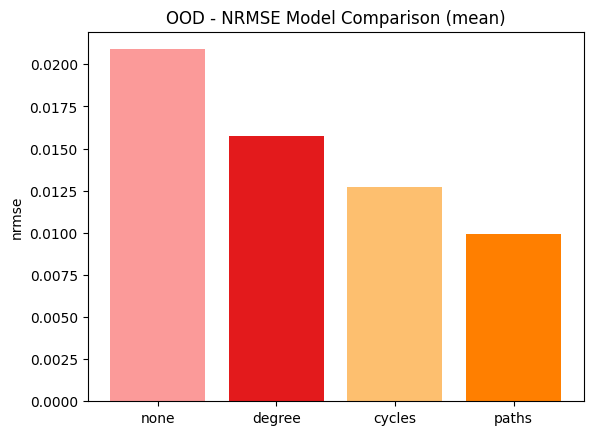

/var/folders/df/z417qg9d5bsgxxrbthy7s1q00000gn/T/ipykernel_94012/647698623.py:56: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(x=x, y=y, showfliers=False, palette=color)


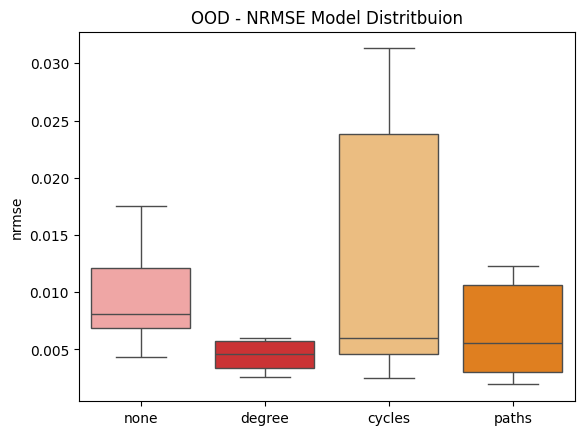

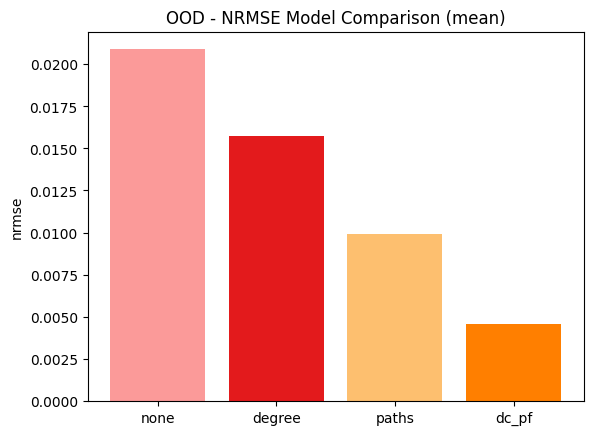

/var/folders/df/z417qg9d5bsgxxrbthy7s1q00000gn/T/ipykernel_94012/647698623.py:56: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(x=x, y=y, showfliers=False, palette=color)


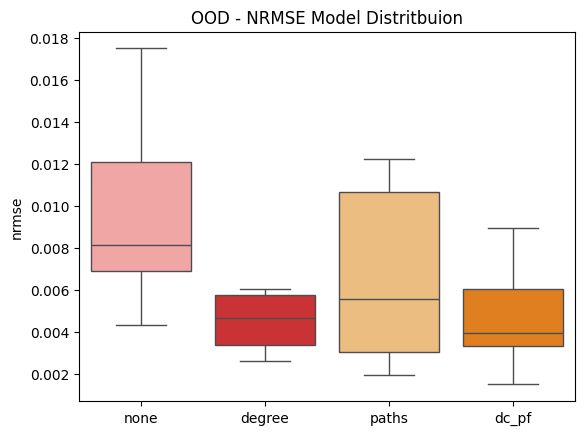

In [695]:
# deg_performance('OOD', ood_degree_df, stat='mean')
# deg_performance('OOD', ood_all_df, stat='mean', all_features=True)
# compare_avg_performance('OOD', ood_performance_df, stat='mean')

# deg_performance('OOD', ood_degree_df, stat='min')
# deg_performance('OOD', ood_all_df, stat='min', all_features=True)
# compare_avg_performance('OOD', ood_performance_df, stat='min')

# deg_performance('OOD', ood_degree_df, stat='max')
# deg_performance('OOD', ood_all_df, stat='max', all_features=True)
# compare_avg_performance('OOD',ood_performance_df, stat='max')

# deg_performance_dist('OOD', ood_degree_df)
# deg_performance_dist('OOD', ood_all_df, all_features=True)
# show_performance_dist('OOD', ood_performance_df)

custom_variations = {
    'none': (False, False, False, False),
    'degree': (False, False, True, False),
    'cycles': (True, False, False, False),
    'paths': (False, True, False, False),
}

compare_avg_performance('OOD', ood_everything_df, stat='mean', variations=custom_variations)
show_performance_dist('OOD', ood_everything_df, variations=custom_variations)

custom_variations_dc = {
    'none': (False, False, False, False),
    'degree': (False, False, True, False),
    'paths': (False, True, False, False),
    'dc_pf': (False, False, False, True)
}

compare_avg_performance('OOD', ood_everything_df, stat='mean', variations=custom_variations_dc)
show_performance_dist('OOD', ood_everything_df, variations=custom_variations_dc)

In [494]:
# TL_PERFORMANCE_FILE = 'out/GCN/20250117-172750/results_tl.csv' # Free model
# TL_PERFORMANCE_FILE = 'out/GCN/20250118-195430/results_tl.csv' # With fixed known values
TL_PERFORMANCE_FILE = 'out/GCN/20250118-230214/results_tl.csv' # With fixed known values and real nrmse
tl_performance_df = pd.read_csv(TL_PERFORMANCE_FILE, index_col=0)
print(list(tl_performance_df.columns))
tl_performance_df.describe()

['training_grid', 'testing_grid', 'cycles', 'path_lengths', 'nrmse_test', 'best_val_loss', 'train_time', 'total_epochs']


,nrmse_test,best_val_loss,train_time,total_epochs
count,360.000000,360.0,360.0,360.0
mean,51.654792,0.0,0.0,0.0
std,781.205947,0.0,0.0,0.0
min,0.436007,0.0,0.0,0.0
25%,1.382553,0.0,0.0,0.0
50%,2.904409,0.0,0.0,0.0
75%,7.368464,0.0,0.0,0.0
max,14810.972734,0.0,0.0,0.0


In [500]:
# TL_DEGREE_FILE = 'out/GCN/20250118-184031/results_tl.csv'
TL_DEGREE_FILE = 'out/GCN/20250118-234035/results_tl.csv' # With fixed known values and real nrmse
tl_degree_df = pd.read_csv(TL_DEGREE_FILE, index_col=0)
print(list(tl_degree_df.columns))
tl_degree_df.describe()

['training_grid', 'testing_grid', 'cycles', 'path_lengths', 'degree', 'nrmse_test', 'best_val_loss', 'train_time', 'total_epochs']


,nrmse_test,best_val_loss,train_time,total_epochs
count,90.000000,90.0,90.0,90.0
mean,124.882843,0.0,0.0,0.0
std,981.877550,0.0,0.0,0.0
min,0.478722,0.0,0.0,0.0
25%,1.141293,0.0,0.0,0.0
50%,2.186390,0.0,0.0,0.0
75%,4.819785,0.0,0.0,0.0
max,9229.254036,0.0,0.0,0.0


In [501]:
# TL_ALL_FILE = 'out/GCN/20250118-194154/results_ood.csv'
TL_ALL_FILE = 'out/GCN/20250118-234205/results_tl.csv' # With fixed known values and real nrmse
tl_all_df = pd.read_csv(TL_ALL_FILE, index_col=0)
print(list(tl_all_df.columns))
tl_all_df.describe()

['training_grid', 'testing_grid', 'cycles', 'path_lengths', 'degree', 'nrmse_test', 'best_val_loss', 'train_time', 'total_epochs']


,nrmse_test,best_val_loss,train_time,total_epochs
count,90.000000,90.0,90.0,90.0
mean,9.123677,0.0,0.0,0.0
std,26.929854,0.0,0.0,0.0
min,0.587187,0.0,0.0,0.0
25%,1.469923,0.0,0.0,0.0
50%,3.029169,0.0,0.0,0.0
75%,7.128692,0.0,0.0,0.0
max,220.548381,0.0,0.0,0.0


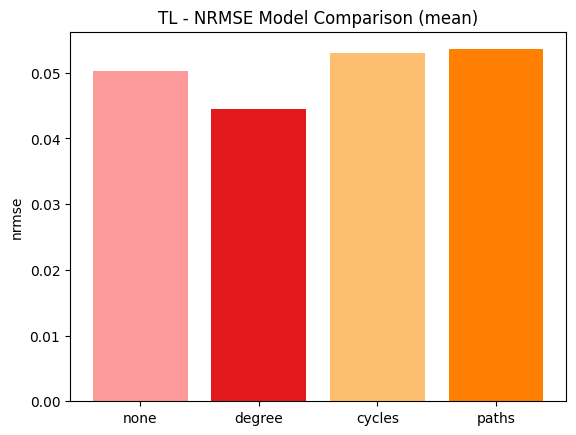

/var/folders/df/z417qg9d5bsgxxrbthy7s1q00000gn/T/ipykernel_94012/647698623.py:56: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(x=x, y=y, showfliers=False, palette=color)


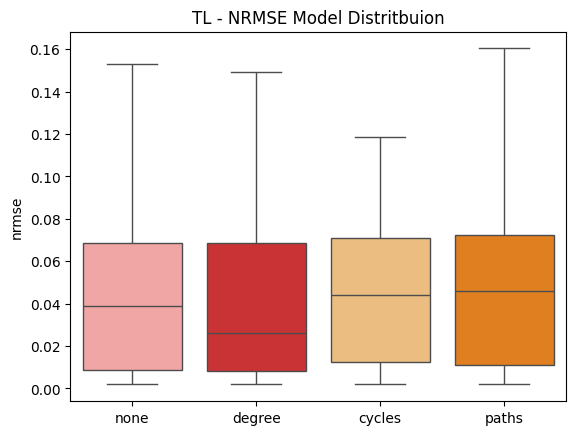

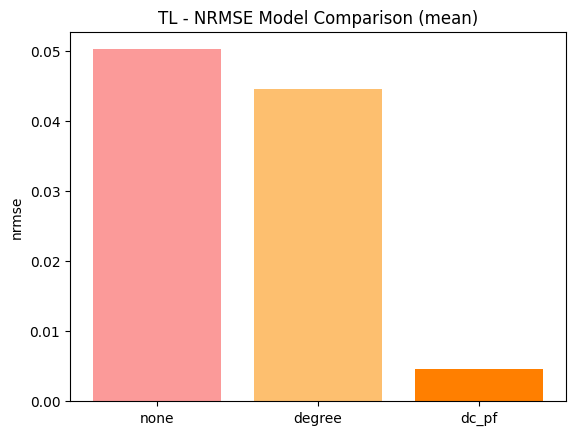

/var/folders/df/z417qg9d5bsgxxrbthy7s1q00000gn/T/ipykernel_94012/647698623.py:56: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(x=x, y=y, showfliers=False, palette=color)


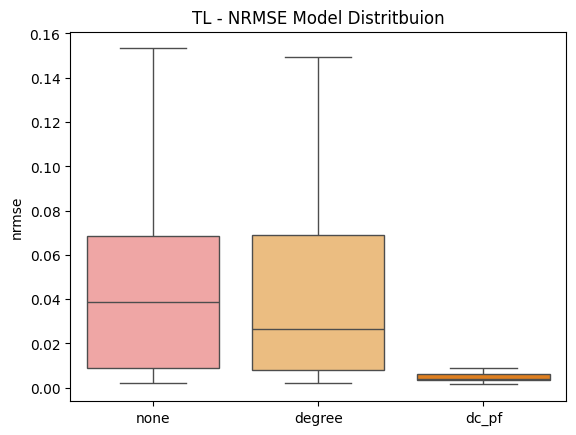

In [697]:
# deg_performance('TL', tl_degree_df, stat='mean')
# deg_performance('TL', tl_all_df, stat='mean', all_features=True)
# compare_avg_performance('TL', tl_performance_df, stat='mean')

# deg_performance('TL', tl_degree_df, stat='min')
# deg_performance('TL', tl_all_df, stat='min', all_features=True)
# compare_avg_performance('TL', tl_performance_df, stat='min')

# deg_performance('TL', tl_degree_df, stat='max')
# deg_performance('TL', tl_all_df, stat='max', all_features=True)
# compare_avg_performance('TL',tl_performance_df, stat='max')

# deg_performance_dist('TL', tl_degree_df)
# deg_performance_dist('TL', tl_all_df, all_features=True)
# show_performance_dist('TL', tl_performance_df)

custom_variations = {
    'none': (False, False, False, False),
    'degree': (False, False, True, False),
    'cycles': (True, False, False, False),
    'paths': (False, True, False, False),
}

compare_avg_performance('TL', tl_everything_df, stat='mean', variations=custom_variations)
show_performance_dist('TL', tl_everything_df, variations=custom_variations)

custom_variations_dc = {
    'none': (False, False, False, False),
    'degree': (False, False, True, False),
    # 'paths': (False, True, False, False),
    'dc_pf': (False, False, False, True)
}

compare_avg_performance('TL', tl_everything_df, stat='mean', variations=custom_variations_dc)
show_performance_dist('TL', tl_everything_df, variations=custom_variations_dc)

In [503]:
tl_performance_df[tl_performance_df['nrmse_test'] == tl_performance_df['nrmse_test'].max()]

,training_grid,testing_grid,cycles,path_lengths,nrmse_test,best_val_loss,train_time,total_epochs
324,1-MV-urban--1-no_sw,1-LV-rural1--1-no_sw,False,False,14810.972734,0.0,0.0,0.0


## Graph Similarity Analysis

In [621]:
OOD_MMD_FILE = 'ood_mmds_data.csv'
ood_mmd_df = pd.read_csv(OOD_MMD_FILE, index_col=0)
ood_mmd_df.describe()

,mmd_degree,mmd_laplacian,mmd_cycle
count,10.000000,10.000000,10.000000
mean,0.788942,0.838901,0.517849
std,0.293471,0.224525,0.494091
min,0.468654,0.642798,0.128661
25%,0.553539,0.690105,0.129337
50%,0.745955,0.743402,0.264660
75%,0.907327,0.925555,0.908215
max,1.420892,1.334370,1.367956


In [622]:
TL_MMD_FILE = 'tl_mmds_data.csv'
tl_mmd_df = pd.read_csv(TL_MMD_FILE, index_col=0)
tl_mmd_df.describe()

,mmd_degree,mmd_laplacian,mmd_cycle
count,45.000000,45.000000,45.000000
mean,0.496524,1.504970,0.163065
std,0.485316,0.308268,0.141096
min,0.004249,1.029652,0.000042
25%,0.135125,1.241497,0.038371
50%,0.290575,1.489830,0.179620
75%,0.660173,1.775929,0.265746
max,1.746394,1.998903,0.502904


### MMD Range

In [631]:
def show_mmd_range(experiment, mmd_df):
    descriptors = list(filter(lambda col: 'mmd' in col, mmd_df.columns))
    for desc in descriptors:
        print(experiment, desc)
        print('Total mmds:', len(mmd_df))
        print('Unique mmds:', len(mmd_df[desc].unique()))
        plt.scatter(range(len(mmd_df)), sorted(mmd_df[desc].values))
        plt.ylabel('mmd')
        plt.xlabel('id')
        plt.title(f'{experiment} - {desc} (in order)')
        plt.show()

OOD mmd_degree
Total mmds: 10
Unique mmds: 10


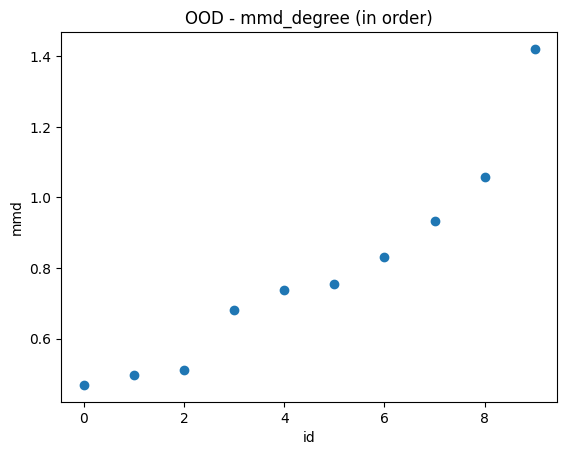

OOD mmd_laplacian
Total mmds: 10
Unique mmds: 10


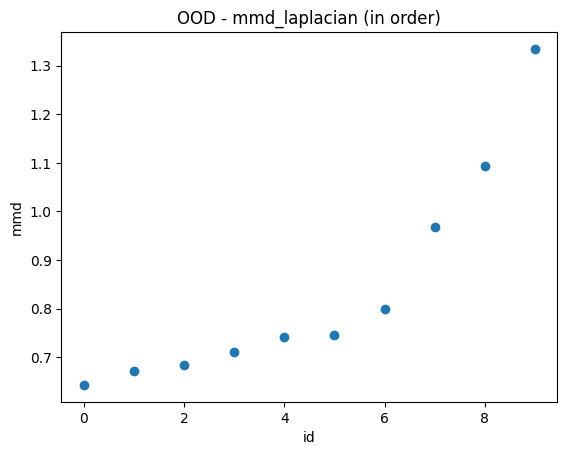

OOD mmd_cycle
Total mmds: 10
Unique mmds: 10


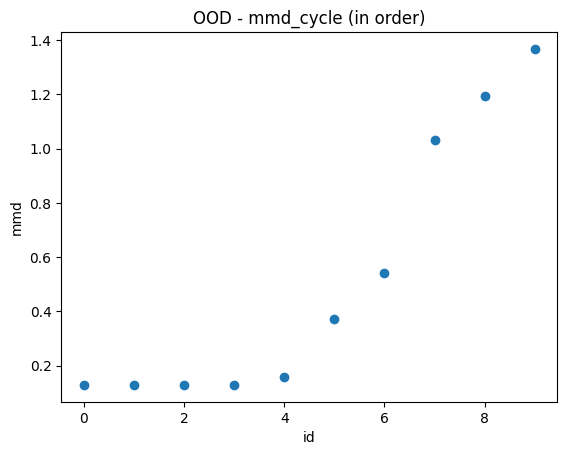

In [507]:
show_mmd_range('OOD', ood_mmd_df)

TL mmd_degree
Total mmds: 45
Unique mmds: 45


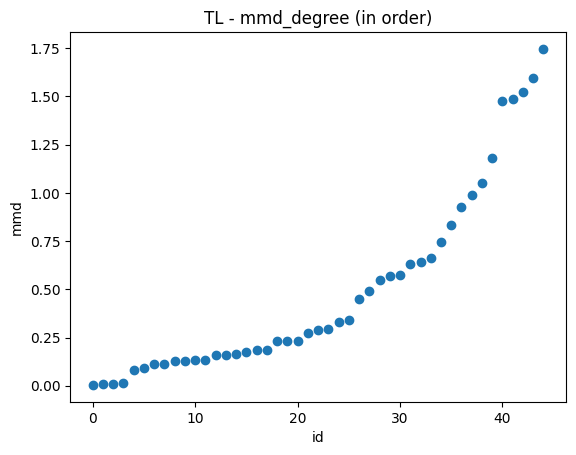

TL mmd_laplacian
Total mmds: 45
Unique mmds: 45


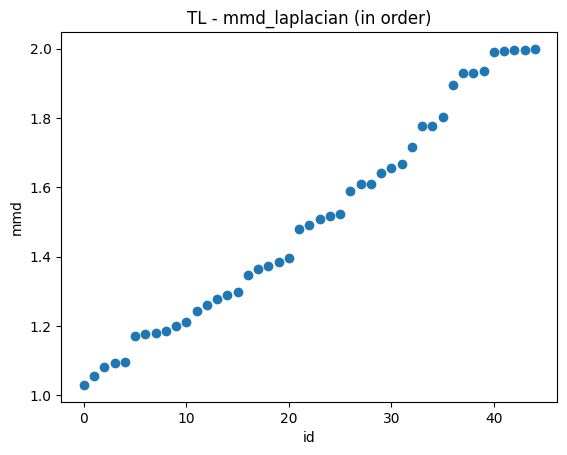

TL mmd_cycle
Total mmds: 45
Unique mmds: 45


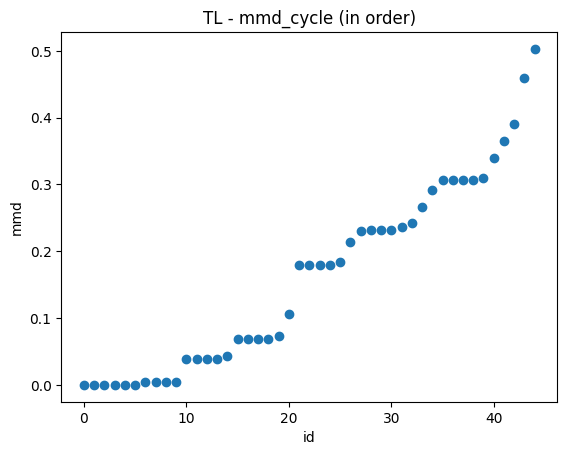

In [508]:
show_mmd_range('TL', tl_mmd_df)

### MMD Correlation

In [642]:
def get_mmd_mean_nrmse_correlation(experiment, performance_df, mmd_df, descriptor):
    def get_sub_df(experiment, df, test_case):
        if experiment.lower() == 'tl':
            return df[(df['training_grid'] == test_case[0]) & (df['testing_grid'] == test_case[1])]
        elif experiment.lower() == 'ood':
            return df[df['testing_grid'] == test_case[1]]
        else:
            assert False, 'need a valid experiment'

    if experiment.lower() == 'tl':
        test_cases = tl_get_performance_test_cases(get_dist_grid_codes(scenario=1))
    elif experiment.lower() == 'ood':
        test_cases = ood_get_performance_test_cases(get_dist_grid_codes(scenario=1))
    else:
        return None
    
    mmds = []
    mean_nrmses = []
    for case in test_cases:
        # df = performance_df[performance_df['dc_pf'] == False]
        # df = df[(df['cycles'] == True) & (df['path_lengths'] == True)]
        df = performance_df
        nrmses = get_sub_df(experiment, df, case)['nrmse_test'].values.tolist()
        if len(nrmses) == 0:
            continue
        
        nrmses = list(filter(lambda x: x < 50, nrmses))
        
        mean_nrmses.extend(
            nrmses
        )
        mmd_arr = get_sub_df(experiment, mmd_df, case)[descriptor].values
        if len(mmd_arr) == 0:
            case = list(reversed(case))
            mmd_arr = get_sub_df(experiment, mmd_df, case)[descriptor].values
        mmds.extend(
            [mmd_arr[0]]*len(nrmses)
        )
        # if mean_nrmses[-1] > 1.0:
        #     mean_nrmses.pop()
        #     mmds.pop()
    
    plt.scatter(mmds, mean_nrmses)
    plt.xlabel('mmd')
    plt.ylabel('nrmse')
    plt.legend()
    plt.title(f'{experiment} - {descriptor}')
    return np.array(mmds), np.array(mean_nrmses)

from functools import partial
from scipy.optimize import minimize

def plot_corr_line(mmds, mean_nrmses, corr):
    def err_f(m, c, known_x, known_y):
        y_pred = m * known_x + c
        return np.sum(np.square(known_y - y_pred))
    
    err_f_fixed = partial(err_f, corr, known_x=mmds, known_y=mean_nrmses)

    # Make sure err_f_fixed is correct:
    assert err_f(corr, 0.1, mmds, mean_nrmses) == err_f_fixed(0.1)

    opt_result = minimize(err_f_fixed, 0)
    opt_intercept = opt_result.x[0]

    line_x = np.linspace(mmds.min(), mmds.max())
    line_y_calculated = corr * line_x + opt_intercept
    plt.plot(line_x, line_y_calculated, '--r')

def show_correlation(experiment, performance_df, mmd_df, descriptors=None):
    if not descriptors:
        descriptors = list(filter(lambda col: 'mmd' in col, mmd_df.columns))
    correlations = ['pearson', 'spearman']
    plot_correlations = False
    total_points = 0
    for desc in descriptors:
        mmds, mean_nrmses = get_mmd_mean_nrmse_correlation(experiment,
                                                           performance_df,
                                                           mmd_df,
                                                           desc)
        corr = None
        if len(mmds) == 0:
            print('No data')
            continue
        for corr_func_name in correlations:
            corr = compute_correlation(mmds, mean_nrmses, correlation_type=corr_func_name)
            print(f'{corr_func_name} correlation:', corr)
            if corr > 0.5 and plot_correlations:
                plot_corr_line(mmds, mean_nrmses, corr)
        plt.show()
        total_points += len(mmds)
    return total_points

def get_segments_tl(segments_list, cases):
    segments = []
    for train_seg, test_seg in segments_list:
        seg = cases.query(f"training_grid.str.contains('{train_seg}') and testing_grid.str.contains('{test_seg}')")
        segments.append((train_seg, test_seg, seg))
    return segments

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


pearson correlation: 0.5785260671747829
spearman correlation: 0.18699547885884987


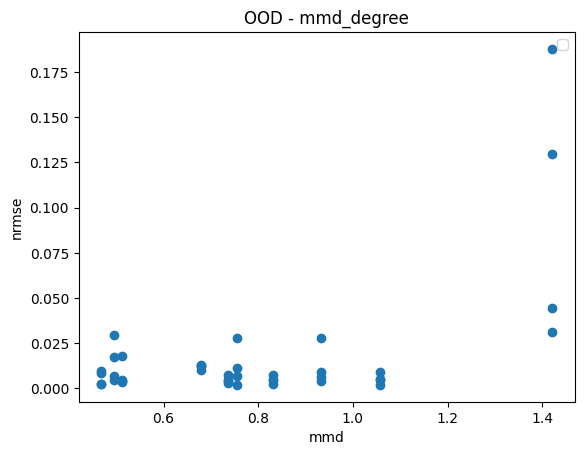

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


pearson correlation: 0.6077772334124792
spearman correlation: 0.15758893178024044


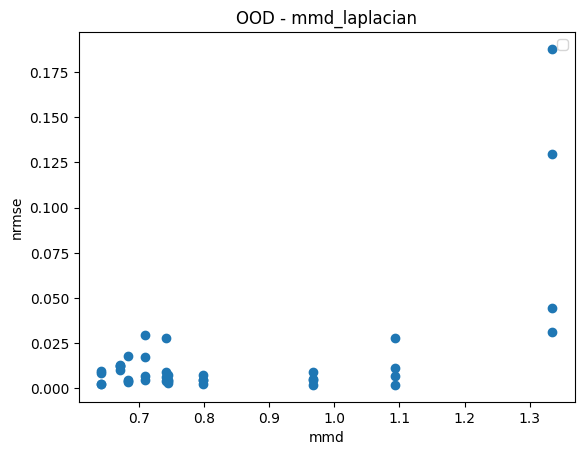

80

In [643]:
df = ood_performance_df[(ood_performance_df['cycles'] == False) &
                       (ood_performance_df['path_lengths'] == False) &
                       (ood_performance_df['degree'] == False)]
df = ood_performance_df
show_correlation('OOD', ood_performance_df, ood_mmd_df, descriptors=['mmd_degree', 'mmd_laplacian'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



LV vs 
pearson correlation: 0.3388781871314155
spearman correlation: 0.2771899836905559


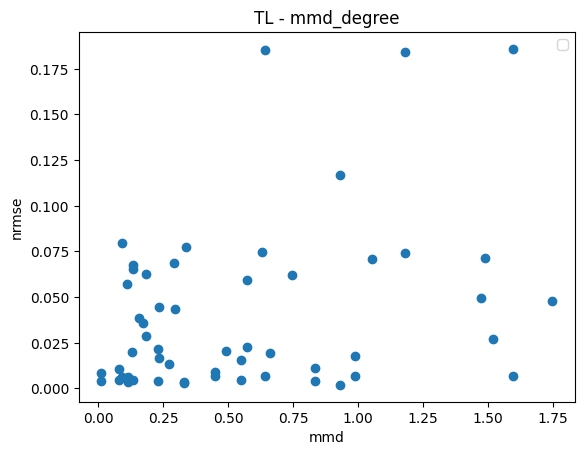

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


pearson correlation: 0.2800225894994485
spearman correlation: 0.10004766398954863


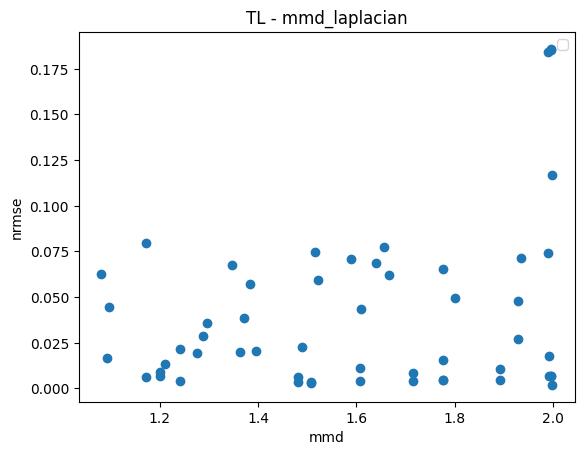

In [646]:
grid_level_segments = [
    # ('LV', ''),
    # ('LV', 'MV'),
    # ('MV', 'LV'),
    ('LV', '')
]

df = tl_performance_df[(tl_performance_df['cycles'] == False) &
                       (tl_performance_df['path_lengths'] == False) &
                       (tl_performance_df['degree'] == False)]
# df = tl_performance_df
# df = pd.concat([tl_performance_df, tl_degree_df, tl_all_df], ignore_index=True)
segments = get_segments_tl(grid_level_segments, df)
for train_seg, test_seg, seg in segments:
    print(f'\n{train_seg} vs {test_seg}')
    show_correlation('TL', seg, tl_mmd_df, descriptors=['mmd_degree', 'mmd_laplacian'])


In [612]:
pd.concat([tl_performance_df, tl_degree_df], ignore_index=True).index

RangeIndex(start=0, stop=450, step=1)

In [520]:
df = tl_performance_df[(tl_performance_df['cycles'] == False) &
                       (tl_performance_df['path_lengths'] == False)]
df = tl_performance_df
df[df['nrmse_test'] == df['nrmse_test'].max()]

,training_grid,testing_grid,cycles,path_lengths,nrmse_test,best_val_loss,train_time,total_epochs
324,1-MV-urban--1-no_sw,1-LV-rural1--1-no_sw,False,False,14810.972734,0.0,0.0,0.0


In [ ]:
grid_level_segments = [
    ('LV', ''),
    # ('LV', 'MV'),
    # ('MV', 'LV'),
    ('MV', '')
]

df = tl_performance_df[(tl_performance_df['cycles'] == False) &
                       (tl_performance_df['path_lengths'] == False)]
# df = tl_performance_df
segments = get_segments_tl(grid_level_segments, df)
for train_seg, test_seg, seg in segments:
    print(f'\n{train_seg} vs {test_seg}')
    show_correlation('TL', seg, tl_mmd_df, descriptors=['mmd_degree', 'mmd_laplacian'])


In [521]:
df.tail()

,training_grid,testing_grid,cycles,path_lengths,nrmse_test,best_val_loss,train_time,total_epochs
355,1-MV-urban--1-no_sw,1-MV-rural--1-no_sw,False,True,2.855445,0.0,0.0,0.0
356,1-MV-urban--1-no_sw,1-MV-semiurb--1-no_sw,False,False,1.784638,0.0,0.0,0.0
357,1-MV-urban--1-no_sw,1-MV-semiurb--1-no_sw,True,True,1.291088,0.0,0.0,0.0
358,1-MV-urban--1-no_sw,1-MV-semiurb--1-no_sw,True,False,1.084918,0.0,0.0,0.0
359,1-MV-urban--1-no_sw,1-MV-semiurb--1-no_sw,False,True,2.838194,0.0,0.0,0.0


In [516]:
df[(df['training_grid'] == '1-MV-urban--1-no_sw') & (df['testing_grid'] == '1-LV-rural1--1-no_sw')]

,training_grid,testing_grid,cycles,path_lengths,nrmse_test,best_val_loss,train_time,total_epochs
324,1-MV-urban--1-no_sw,1-LV-rural1--1-no_sw,False,False,14810.972734,0.0,0.0,0.0
325,1-MV-urban--1-no_sw,1-LV-rural1--1-no_sw,True,True,110.354213,0.0,0.0,0.0
326,1-MV-urban--1-no_sw,1-LV-rural1--1-no_sw,True,False,19.270120,0.0,0.0,0.0
327,1-MV-urban--1-no_sw,1-LV-rural1--1-no_sw,False,True,20.471951,0.0,0.0,0.0



LV vs 


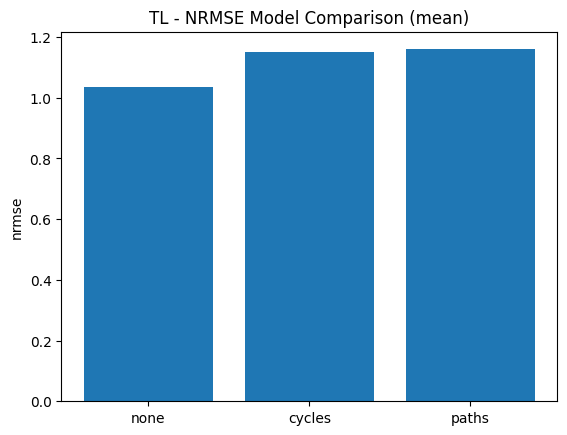

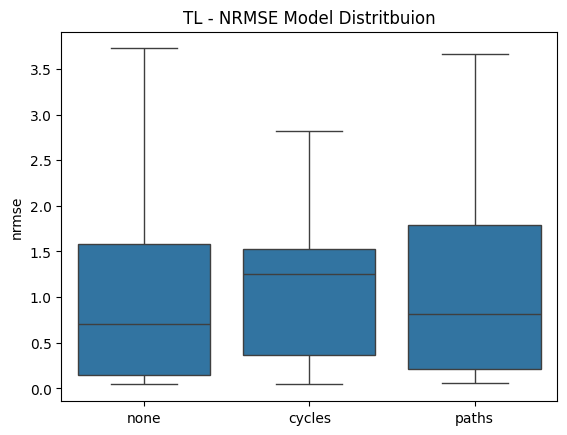


MV vs 


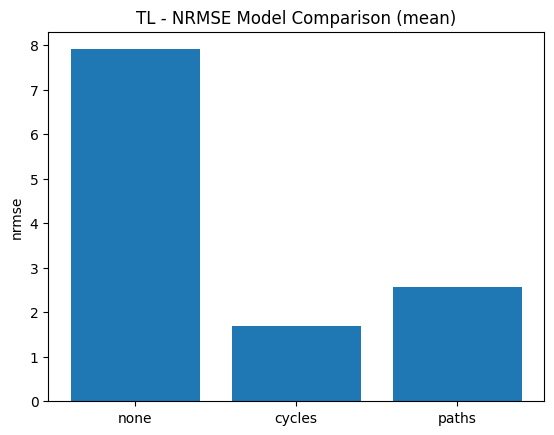

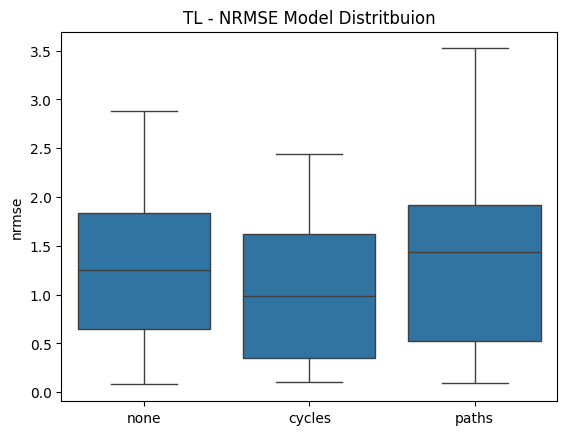

In [318]:
grid_level_segments = [
    ('LV', ''),
    # ('LV', 'MV'),
    # ('MV', 'LV'),
    ('MV', '')
]

segments = get_segments_tl(grid_level_segments, tl_performance_df)
for train_seg, test_seg, seg in segments:
    print(f'\n{train_seg} vs {test_seg}')
    compare_avg_performance('TL', seg, stat='mean')
    show_performance_dist('TL', seg)

In [72]:
get_dist_grid_codes(scenario=1)

['1-LV-rural1--1-no_sw',
 '1-LV-rural2--1-no_sw',
 '1-LV-rural3--1-no_sw',
 '1-LV-semiurb4--1-no_sw',
 '1-LV-semiurb5--1-no_sw',
 '1-LV-urban6--1-no_sw',
 '1-MV-comm--1-no_sw',
 '1-MV-rural--1-no_sw',
 '1-MV-semiurb--1-no_sw',
 '1-MV-urban--1-no_sw']


rural vs 


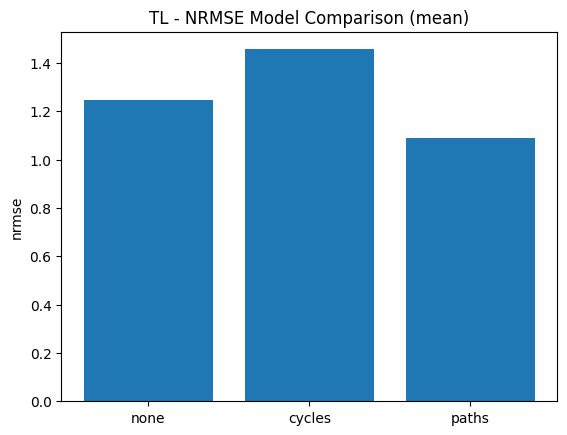

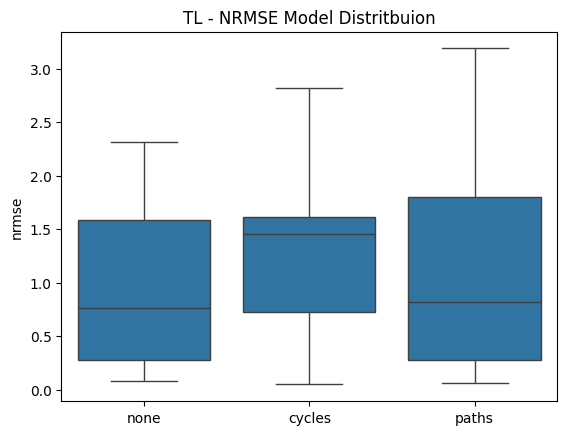


urb vs 


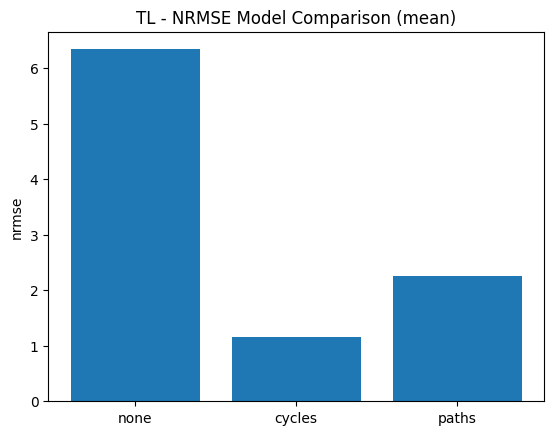

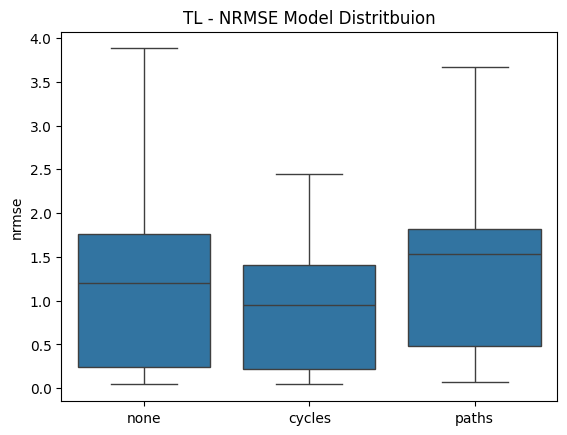


comm vs 


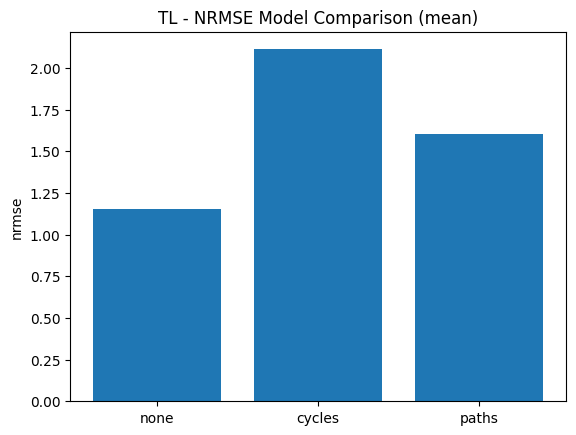

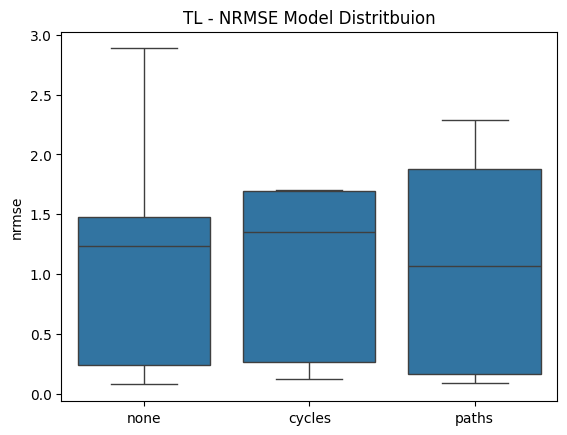

In [268]:
grid_level_segments = [
    ('rural', ''),
    # ('LV', 'MV'),
    # ('MV', 'LV'),
    ('urb', ''),
    ('comm', '')
]

segments = get_segments_tl(grid_level_segments, tl_performance_df)
for train_seg, test_seg, seg in segments:
    print(f'\n{train_seg} vs {test_seg}')
    compare_avg_performance('TL', seg, stat='mean')
    show_performance_dist('TL', seg)

# Extra

In [37]:
def show_correlation(descriptor):
    nrsmes, mmds = df[(df['cycles'] == False) & (df['path_lengths'] == False) & (df['dc_opf'] == False) & (df['nrmse_test'] < 19)][['nrmse_test', 'mmd_degree']].values.T
    nrsmes_2, mmds_2 = df[(df['cycles'] == True) & (df['path_lengths'] == True) & (df['dc_opf'] == False) & (df['nrmse_test'] < 19)][['nrmse_test', 'mmd_degree']].values.T
    nrsmes_3, mmds_3 = df[(df['cycles'] == True) & (df['path_lengths'] == False) & (df['dc_opf'] == False) & (df['nrmse_test'] < 19)][['nrmse_test', 'mmd_degree']].values.T
    nrsmes_4, mmds_4 = df[(df['cycles'] == False) & (df['path_lengths'] == True) & (df['dc_opf'] == False) & (df['nrmse_test'] < 19)][['nrmse_test', 'mmd_degree']].values.T

    plt.scatter(mmds, nrsmes, label='none')
    plt.scatter(mmds_2, nrsmes_2, label='both')
    plt.scatter(mmds_3, nrsmes_3, label='cycles')
    plt.scatter(mmds_4, nrsmes_4, label='paths')
    plt.legend()
    plt.show()

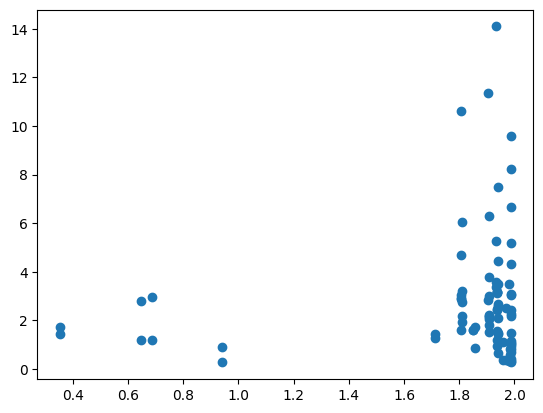

In [108]:
nrsmes, mmds = df[(df['cycles'] == False) & (df['path_lengths'] == False) & (df['dc_opf'] == False) & (df['nrmse_test'] < 19)][['nrmse_test', 'mmd_degree']].values.T
plt.scatter(mmds, nrsmes)

In [45]:
df[df['dc_opf'] == False].describe()

,nrmse_test,best_val_loss,train_time,total_epochs,mmd_degree,mmd_laplacian
count,360.000000,360.000000,360.000000,360.0,360.000000,360.000000
mean,13.353497,0.002315,37.359608,500.0,1.772820,1.476754
std,68.862492,0.002974,6.491419,0.0,0.362751,0.298242
min,0.080065,0.000018,26.649956,500.0,0.346931,1.022851
25%,1.003058,0.000201,31.152602,500.0,1.821241,1.212702
50%,2.730758,0.001740,36.385933,500.0,1.897400,1.452129
75%,6.370264,0.003962,44.304179,500.0,1.942118,1.702491
max,1117.661429,0.039247,48.958767,500.0,1.947629,1.971086


In [109]:
# TL
RESULTS = 'out/GCN/20250116-014912/results_tl.csv'
df = pd.read_csv(RESULTS, index_col=0)
df.head()

,training_grid,testing_grid,cycles,path_lengths,nrmse_test,best_val_loss,train_time,total_epochs,dc_opf,mmd_degree,mmd_laplacian
0,1-LV-rural1--1-no_sw,1-LV-rural2--1-no_sw,False,False,1.100451,0.006197,44.188354,500.0,False,1.947629,1.971061
1,1-LV-rural1--1-no_sw,1-LV-rural2--1-no_sw,True,True,25.674349,0.000027,43.722917,500.0,False,1.947629,1.971061
2,1-LV-rural1--1-no_sw,1-LV-rural2--1-no_sw,True,False,2.745599,0.000048,43.939853,500.0,False,1.947629,1.971061
3,1-LV-rural1--1-no_sw,1-LV-rural2--1-no_sw,False,True,10.041558,0.000209,44.148045,500.0,False,1.947629,1.971061
4,NaN,1-LV-rural2--1-no_sw,False,False,0.146099,NaN,NaN,NaN,True,NaN,NaN


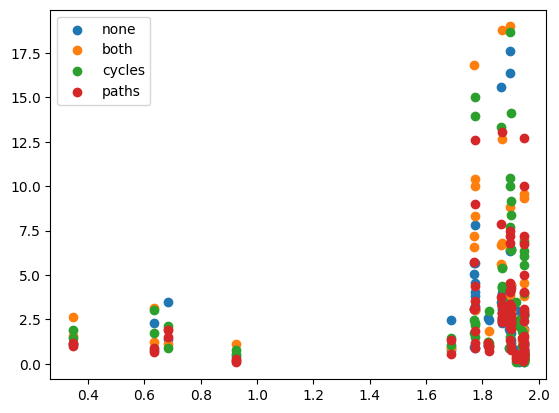

In [ ]:
nrsmes, mmds = df[(df['cycles'] == False) & (df['path_lengths'] == False) & (df['dc_opf'] == False) & (df['nrmse_test'] < 19)][['nrmse_test', 'mmd_degree']].values.T
nrsmes_2, mmds_2 = df[(df['cycles'] == True) & (df['path_lengths'] == True) & (df['dc_opf'] == False) & (df['nrmse_test'] < 19)][['nrmse_test', 'mmd_degree']].values.T
nrsmes_3, mmds_3 = df[(df['cycles'] == True) & (df['path_lengths'] == False) & (df['dc_opf'] == False) & (df['nrmse_test'] < 19)][['nrmse_test', 'mmd_degree']].values.T
nrsmes_4, mmds_4 = df[(df['cycles'] == False) & (df['path_lengths'] == True) & (df['dc_opf'] == False) & (df['nrmse_test'] < 19)][['nrmse_test', 'mmd_degree']].values.T

plt.scatter(mmds, nrsmes, label='none')
plt.scatter(mmds_2, nrsmes_2, label='both')
plt.scatter(mmds_3, nrsmes_3, label='cycles')
plt.scatter(mmds_4, nrsmes_4, label='paths')
plt.legend()

In [121]:
mmds = sorted(df['mmd_degree'].unique())
nrmses = [[], [], [], []]

for mmd in mmds:
    len(df[(df['mmd_degree'] == mmd) & (df['dc_opf'] == False)]['nrmse_test'])
    # none, both, cycles, paths
    break

48


<BarContainer object of 5 artists>

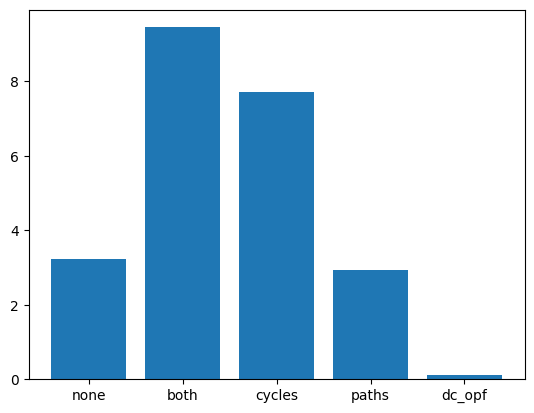

In [126]:
variations = ['none', 'both', 'cycles', 'paths', 'dc_opf']
counts = [
    df[(df['cycles'] == False) & (df['path_lengths'] == False) & (df['dc_opf'] == False) & (df['nrmse_test'] < 50)]['nrmse_test'].mean(),
    df[(df['cycles'] == True) & (df['path_lengths'] == True) & (df['dc_opf'] == False) & (df['nrmse_test'] < 50)]['nrmse_test'].mean(),
    df[(df['cycles'] == True) & (df['path_lengths'] == False) & (df['dc_opf'] == False) & (df['nrmse_test'] < 50)]['nrmse_test'].mean(),
    df[(df['cycles'] == False) & (df['path_lengths'] == True) & (df['dc_opf'] == False) & (df['nrmse_test'] < 50)]['nrmse_test'].mean(),
    df[(df['dc_opf'] == True) & (df['nrmse_test'] < 50)]['nrmse_test'].mean()
]
plt.bar(variations, counts)

In [77]:
grids = list(df['training_grid'].unique())
for grid in grids:
    sub_df = df[(df['testing_grid'] == grid) & (df['dc_opf'] == False)]
    print(sub_df[sub_df['nrmse_test'] == sub_df['nrmse_test'].min()])

            training_grid          testing_grid  cycles  path_lengths  \
227  1-LV-urban6--1-no_sw  1-LV-rural1--1-no_sw    True         False   

     nrmse_test  best_val_loss  train_time  total_epochs  dc_opf  mmd_degree  \
227    0.119828       0.000276   27.554636         500.0   False    1.947629   

     mmd_laplacian  
227       1.971067  
Empty DataFrame
Columns: [training_grid, testing_grid, cycles, path_lengths, nrmse_test, best_val_loss, train_time, total_epochs, dc_opf, mmd_degree, mmd_laplacian]
Index: []
              training_grid          testing_grid  cycles  path_lengths  \
140  1-LV-semiurb4--1-no_sw  1-LV-rural2--1-no_sw   False         False   

     nrmse_test  best_val_loss  train_time  total_epochs  dc_opf  mmd_degree  \
140    0.080065       0.000138   28.027325         500.0   False    1.947629   

     mmd_laplacian  
140       1.706035  
              training_grid          testing_grid  cycles  path_lengths  \
190  1-LV-semiurb5--1-no_sw  1-LV-rural3--1-no

In [71]:
# OOD
RESULTS = 'out/GCN/20250115-194615/results.csv'
df = pd.read_csv(RESULTS, index_col=0)
df.head()

,testing_grid,cycles,path_lengths,nrmse_test,best_val_loss,train_time,total_epochs,dc_opf,mmd_degree,mmd_laplacian
0,1-LV-rural1--1-no_sw,False,False,6.191060,0.533869,41.780578,100.0,False,0.961249,1.043854
1,1-LV-rural1--1-no_sw,True,True,4.618705,0.707258,41.434986,100.0,False,0.961249,1.043854
2,1-LV-rural1--1-no_sw,True,False,6.818756,0.586090,41.311110,100.0,False,0.961249,1.043854
3,1-LV-rural1--1-no_sw,False,True,3.122381,0.479862,41.574191,100.0,False,0.961249,1.043854
4,1-LV-rural1--1-no_sw,False,False,0.031557,NaN,NaN,NaN,True,0.961249,1.043854


In [72]:
df[df['dc_opf'] == False].describe()

,nrmse_test,best_val_loss,train_time,total_epochs,mmd_degree,mmd_laplacian
count,40.000000,40.000000,40.000000,40.0,40.000000,40.000000
mean,1.214359,0.697948,37.159290,100.0,0.833356,0.682968
std,1.498683,0.264672,6.064975,0.0,0.137730,0.157402
min,0.183702,0.360062,27.200630,100.0,0.575182,0.524652
25%,0.325575,0.554972,30.606155,100.0,0.691040,0.573189
50%,0.831044,0.652869,37.100578,100.0,0.871016,0.613630
75%,1.305246,0.741373,42.333610,100.0,0.955930,0.776823
max,6.818756,1.531345,44.974784,100.0,0.962670,1.043854


In [78]:
# OOD
RESULTS = 'out/GCN/20250116-015111/results_ood.csv'
df = pd.read_csv(RESULTS, index_col=0)
df.head()

,testing_grid,cycles,path_lengths,nrmse_test,best_val_loss,train_time,total_epochs,dc_opf,mmd_degree,mmd_laplacian
0,1-LV-rural1--1-no_sw,False,False,6.584836,0.005708,106.531329,500.0,False,0.960323,1.043622
1,1-LV-rural1--1-no_sw,True,True,0.996796,0.005713,101.544770,500.0,False,0.960323,1.043622
2,1-LV-rural1--1-no_sw,True,False,1.421153,0.006347,106.287314,500.0,False,0.960323,1.043622
3,1-LV-rural1--1-no_sw,False,True,3.677033,0.005129,100.181581,500.0,False,0.960323,1.043622
4,1-LV-rural1--1-no_sw,False,False,0.031542,NaN,NaN,NaN,True,0.960323,1.043622


In [79]:
df[df['dc_opf'] == False].describe()

,nrmse_test,best_val_loss,train_time,total_epochs,mmd_degree,mmd_laplacian
count,40.000000,40.000000,40.000000,40.0,40.000000,40.000000
mean,1.031609,0.004843,100.561181,500.0,0.836322,0.682016
std,1.186249,0.001202,4.600420,0.0,0.134622,0.157273
min,0.163170,0.002336,93.982537,500.0,0.583511,0.527847
25%,0.325154,0.004134,96.660066,500.0,0.702826,0.570459
50%,0.640922,0.005075,100.137390,500.0,0.871812,0.613827
75%,1.111878,0.005500,102.467868,500.0,0.960323,0.774497
max,6.584836,0.007579,111.470562,500.0,0.960460,1.043622


In [80]:
grids = list(df['testing_grid'].unique())
for grid in grids:
    sub_df = df[(df['testing_grid'] == grid) & (df['dc_opf'] == False)]
    print(sub_df[sub_df['nrmse_test'] == sub_df['nrmse_test'].min()])

           testing_grid  cycles  path_lengths  nrmse_test  best_val_loss  \
1  1-LV-rural1--1-no_sw    True          True    0.996796       0.005713   

   train_time  total_epochs  dc_opf  mmd_degree  mmd_laplacian  
1   101.54477         500.0   False    0.960323       1.043622  
           testing_grid  cycles  path_lengths  nrmse_test  best_val_loss  \
8  1-LV-rural2--1-no_sw   False          True    0.251365       0.005087   

   train_time  total_epochs  dc_opf  mmd_degree  mmd_laplacian  
8    99.98237         500.0   False     0.96046       0.654698  
            testing_grid  cycles  path_lengths  nrmse_test  best_val_loss  \
13  1-LV-rural3--1-no_sw   False          True    0.195198       0.004705   

    train_time  total_epochs  dc_opf  mmd_degree  mmd_laplacian  
13   95.431442         500.0   False    0.834783        0.56627  
              testing_grid  cycles  path_lengths  nrmse_test  best_val_loss  \
18  1-LV-semiurb4--1-no_sw   False          True     0.16317        

### Analyze which model was best for every combination of (training_grid, testing_grid). Aka if augmented features helped or not

In [37]:
grids = list(df['testing_grid'].unique())
cases = get_performance_test_cases(grids)
column_names = [
        'training_grid',
        'testing_grid',
        'cycles',
        'path_lengths',
        'nrmse_test',
    ]
best_models = []
for train_grid, test_grid in cases:
    variations = df[(df['training_grid'] == train_grid) & (df['testing_grid'] == test_grid)]
    min_nrmse = variations['nrmse_test'].min()
    cycles, path_lengths = variations[variations['nrmse_test'] == min_nrmse][['cycles', 'path_lengths']].values[0]
    best_models.append((train_grid, test_grid, cycles, path_lengths, min_nrmse))
best_models = pd.DataFrame(best_models, columns=column_names)
    

In [38]:
best_models

,training_grid,testing_grid,cycles,path_lengths,nrmse_test
0,1-LV-rural1--1-no_sw,1-LV-rural2--1-no_sw,True,False,1.516681
1,1-LV-rural1--1-no_sw,1-LV-rural3--1-no_sw,True,False,1.586082
2,1-LV-rural1--1-no_sw,1-LV-semiurb4--1-no_sw,True,False,1.735056
3,1-LV-rural1--1-no_sw,1-LV-semiurb5--1-no_sw,True,False,1.631298
4,1-LV-rural1--1-no_sw,1-LV-urban6--1-no_sw,True,False,2.054025
5,1-LV-rural1--1-no_sw,1-MV-comm--1-no_sw,False,False,3.221703
6,1-LV-rural1--1-no_sw,1-MV-rural--1-no_sw,False,False,3.515820
7,1-LV-rural1--1-no_sw,1-MV-semiurb--1-no_sw,False,False,3.180164
8,1-LV-rural1--1-no_sw,1-MV-urban--1-no_sw,False,False,3.019990
9,1-LV-rural2--1-no_sw,1-LV-rural1--1-no_sw,False,True,2.633795


In [39]:
best_models.query('cycles == True and path_lengths == True')

,training_grid,testing_grid,cycles,path_lengths,nrmse_test
18,1-LV-rural3--1-no_sw,1-LV-rural1--1-no_sw,True,True,2.210751
27,1-LV-semiurb4--1-no_sw,1-LV-rural1--1-no_sw,True,True,1.248586
28,1-LV-semiurb4--1-no_sw,1-LV-rural2--1-no_sw,True,True,0.776602
29,1-LV-semiurb4--1-no_sw,1-LV-rural3--1-no_sw,True,True,0.581019
30,1-LV-semiurb4--1-no_sw,1-LV-semiurb5--1-no_sw,True,True,0.747133
31,1-LV-semiurb4--1-no_sw,1-LV-urban6--1-no_sw,True,True,0.877351
54,1-MV-comm--1-no_sw,1-LV-rural1--1-no_sw,True,True,4.624321
63,1-MV-rural--1-no_sw,1-LV-rural1--1-no_sw,True,True,7.083424
72,1-MV-semiurb--1-no_sw,1-LV-rural1--1-no_sw,True,True,9.632462
81,1-MV-urban--1-no_sw,1-LV-rural1--1-no_sw,True,True,6.306697


In [33]:
print('Augmented model worked better for:')
best_models.query('cycles == True or path_lengths == True')

Augmented model worked better for:


,training_grid,testing_grid,cycles,path_lengths,nrmse_test
0,1-LV-rural1--1-no_sw,1-LV-rural2--1-no_sw,True,False,1.516681
1,1-LV-rural1--1-no_sw,1-LV-rural3--1-no_sw,True,False,1.586082
2,1-LV-rural1--1-no_sw,1-LV-semiurb4--1-no_sw,True,False,1.735056
3,1-LV-rural1--1-no_sw,1-LV-semiurb5--1-no_sw,True,False,1.631298
4,1-LV-rural1--1-no_sw,1-LV-urban6--1-no_sw,True,False,2.054025
9,1-LV-rural2--1-no_sw,1-LV-rural1--1-no_sw,False,True,2.633795
14,1-LV-rural2--1-no_sw,1-MV-comm--1-no_sw,False,True,3.788913
15,1-LV-rural2--1-no_sw,1-MV-rural--1-no_sw,False,True,3.115055
16,1-LV-rural2--1-no_sw,1-MV-semiurb--1-no_sw,False,True,4.484266
18,1-LV-rural3--1-no_sw,1-LV-rural1--1-no_sw,True,True,2.210751


In [34]:
print('Normal model worked better for:')
best_models.query('cycles == False and path_lengths == False')

Normal model worked better for:


,training_grid,testing_grid,cycles,path_lengths,nrmse_test
5,1-LV-rural1--1-no_sw,1-MV-comm--1-no_sw,False,False,3.221703
6,1-LV-rural1--1-no_sw,1-MV-rural--1-no_sw,False,False,3.515820
7,1-LV-rural1--1-no_sw,1-MV-semiurb--1-no_sw,False,False,3.180164
8,1-LV-rural1--1-no_sw,1-MV-urban--1-no_sw,False,False,3.019990
10,1-LV-rural2--1-no_sw,1-LV-rural3--1-no_sw,False,False,1.036962
11,1-LV-rural2--1-no_sw,1-LV-semiurb4--1-no_sw,False,False,1.152866
12,1-LV-rural2--1-no_sw,1-LV-semiurb5--1-no_sw,False,False,1.086190
13,1-LV-rural2--1-no_sw,1-LV-urban6--1-no_sw,False,False,1.476975
17,1-LV-rural2--1-no_sw,1-MV-urban--1-no_sw,False,False,2.824369
19,1-LV-rural3--1-no_sw,1-LV-rural2--1-no_sw,False,False,0.417719


### Segment the test cases further, in order to draw conclusions about why a particular augmentation may have worked better

In [17]:
def get_segments(segments_list, cases):
    segments = []
    for train_seg, test_seg in segments_list:
        seg = cases.query(f"training_grid.str.contains('{train_seg}') and testing_grid.str.contains('{test_seg}')").drop(columns=['nrmse_test'], errors='ignore')
        segments.append((train_seg, test_seg, seg))
    return segments

#### Segment by grid level (LV vs MV) to check if certain features help when doing transfer learning from LV to MV, and vice versa.

In [18]:
grid_level_segments = [
    ('LV', 'LV'),
    ('LV', 'MV'),
    ('MV', 'LV'),
    ('MV', 'MV')
]

segments = get_segments(grid_level_segments, best_models)
for train_seg, test_seg, seg in segments:
    print(f'\n{train_seg} vs {test_seg}')
    print(seg)



LV vs LV
          training_grid          testing_grid  cycles  path_lengths
0  1-LV-rural1--0-no_sw  1-LV-urban6--0-no_sw    True         False
3  1-LV-urban6--0-no_sw  1-LV-rural1--0-no_sw   False          True

LV vs MV
          training_grid         testing_grid  cycles  path_lengths
1  1-LV-rural1--0-no_sw  1-MV-rural--0-no_sw   False         False
2  1-LV-rural1--0-no_sw  1-MV-urban--0-no_sw   False         False
4  1-LV-urban6--0-no_sw  1-MV-rural--0-no_sw   False          True
5  1-LV-urban6--0-no_sw  1-MV-urban--0-no_sw   False          True

MV vs LV
          training_grid          testing_grid  cycles  path_lengths
6   1-MV-rural--0-no_sw  1-LV-rural1--0-no_sw    True         False
7   1-MV-rural--0-no_sw  1-LV-urban6--0-no_sw    True         False
9   1-MV-urban--0-no_sw  1-LV-rural1--0-no_sw    True         False
10  1-MV-urban--0-no_sw  1-LV-urban6--0-no_sw    True         False

MV vs MV
          training_grid         testing_grid  cycles  path_lengths
8   1-MV-rural

When doing transfer learning from MV to LV, cycles seem to help a lot.  
Going from LV to MV, path length help if the grid is urban.

#### Segment by grid type (rural vs urban) to check if certain features help when doing transfer learning from rural grids to urban grids, and vice versa.

In [19]:
grid_type_segments = [
    ('rural', 'rural'),
    ('rural', 'urban'),
    ('urban', 'rural'),
    ('urban', 'urban')
]

segments = get_segments(grid_type_segments, best_models)
for train_seg, test_seg, seg in segments:
    print(f'\n{train_seg} vs {test_seg}')
    print(seg)


rural vs rural
          training_grid          testing_grid  cycles  path_lengths
1  1-LV-rural1--0-no_sw   1-MV-rural--0-no_sw   False         False
6   1-MV-rural--0-no_sw  1-LV-rural1--0-no_sw    True         False

rural vs urban
          training_grid          testing_grid  cycles  path_lengths
0  1-LV-rural1--0-no_sw  1-LV-urban6--0-no_sw    True         False
2  1-LV-rural1--0-no_sw   1-MV-urban--0-no_sw   False         False
7   1-MV-rural--0-no_sw  1-LV-urban6--0-no_sw    True         False
8   1-MV-rural--0-no_sw   1-MV-urban--0-no_sw   False          True

urban vs rural
           training_grid          testing_grid  cycles  path_lengths
3   1-LV-urban6--0-no_sw  1-LV-rural1--0-no_sw   False          True
4   1-LV-urban6--0-no_sw   1-MV-rural--0-no_sw   False          True
9    1-MV-urban--0-no_sw  1-LV-rural1--0-no_sw    True         False
11   1-MV-urban--0-no_sw   1-MV-rural--0-no_sw    True         False

urban vs urban
           training_grid          testing_grid 

From rural to urban, path length helps more if LV grid as training grid, while cycles help if MV as training grid.  
From urban to rural, cycle more important.

#### Segment results based on Training Grid Type

In [20]:
for train_grid in grids:
  seg = best_models[best_models['training_grid'] == train_grid].drop(columns=['nrmse_test'], errors='ignore')
  print()
  print(train_grid)
  print(seg)


1-LV-rural1--0-no_sw
          training_grid          testing_grid  cycles  path_lengths
0  1-LV-rural1--0-no_sw  1-LV-urban6--0-no_sw    True         False
1  1-LV-rural1--0-no_sw   1-MV-rural--0-no_sw   False         False
2  1-LV-rural1--0-no_sw   1-MV-urban--0-no_sw   False         False

1-LV-urban6--0-no_sw
          training_grid          testing_grid  cycles  path_lengths
3  1-LV-urban6--0-no_sw  1-LV-rural1--0-no_sw   False          True
4  1-LV-urban6--0-no_sw   1-MV-rural--0-no_sw   False          True
5  1-LV-urban6--0-no_sw   1-MV-urban--0-no_sw   False          True

1-MV-rural--0-no_sw
         training_grid          testing_grid  cycles  path_lengths
6  1-MV-rural--0-no_sw  1-LV-rural1--0-no_sw    True         False
7  1-MV-rural--0-no_sw  1-LV-urban6--0-no_sw    True         False
8  1-MV-rural--0-no_sw   1-MV-urban--0-no_sw   False          True

1-MV-urban--0-no_sw
          training_grid          testing_grid  cycles  path_lengths
9   1-MV-urban--0-no_sw  1-LV-rura

If LV and urban, path lengths help.  
If MV and urban, cycles help.  
If MV and rural, cycles mostly help.  

### Conclusions

If training grid is LV and Urban: Path lengths help.

When training grid is MV grid, cycles help a lot.

No situation in which both helped.

### Follow up Questions

Can we include this indication of if LV vs MV, and rural vs urban as graph-level features that impact training?